In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import utils

if __name__ == "__main__":
    directory = '../inputs/'

    decrescent, crescent, efficiency = utils.get_results(directory)    

In [3]:
df = pd.DataFrame()

In [4]:
df['Decrescente'] = decrescent.values()
df['Crescente'] = crescent.values()
df['Eficiente'] = efficiency.values()
df.index = utils.get_instances(directory)

In [5]:
df

,Decrescente,Crescente,Eficiente
input1.in,12840,11928,15624
input2.in,19687,31455,31455
input3.in,39665,50044,51508
input4.in,39578,26157,29868
input5.in,21019,7725,11050
input6.in,64727,22,64690
input7.in,2129,898,1452
input8.in,1017,761,761
input9.in,19976,10341,10341
input10.in,39897,20378,20378


## **Estilos**

In [6]:
plt.style.use('seaborn')
plt.style.use('bmh')
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

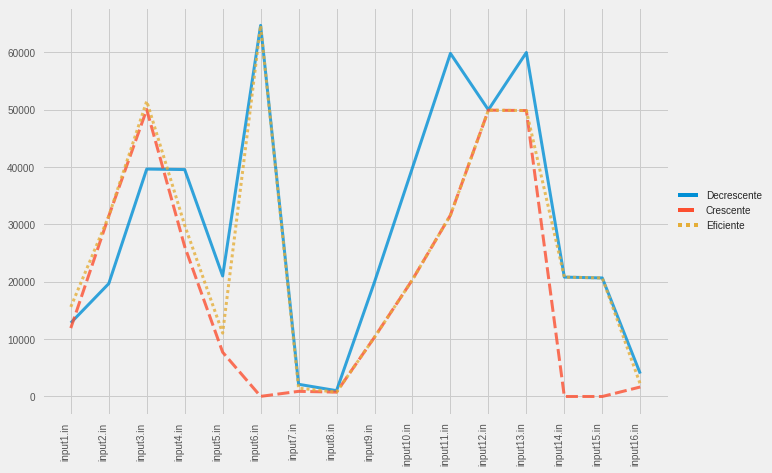

In [7]:
plt.figure(figsize=(10,7)) #(largura,altura)
sns.lineplot(data=df, lw=3,sort=False, alpha=0.8)
plt.xticks(rotation=90, ha='right')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.savefig('./fat_knapsack.pdf')

In [47]:
print(df.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Decrescente &  Crescente &  Eficiente \\
\midrule
input1.in  &        12840 &      11928 &      15624 \\
input2.in  &        19687 &      31455 &      31455 \\
input3.in  &        39665 &      50044 &      51508 \\
input4.in  &        39578 &      26157 &      29868 \\
input5.in  &        21019 &       7725 &      11050 \\
input6.in  &        64727 &         22 &      64690 \\
input7.in  &         2129 &        898 &       1452 \\
input8.in  &         1017 &        761 &        761 \\
input9.in  &        19976 &      10341 &      10341 \\
input10.in &        39897 &      20378 &      20378 \\
input11.in &        59836 &      31633 &      31633 \\
input12.in &        49988 &      49938 &      49938 \\
input13.in &        59990 &      49871 &      49871 \\
input14.in &        20820 &          0 &      20820 \\
input15.in &        20676 &          0 &      20676 \\
input16.in &         3995 &       1657 &       2152 \\
\bottomrule
\end{tabular}



## **Adicionando os resultados exatos**

In [8]:
exact = [('input1.in', 31621, '0.40869'), ('input2.in', 67829, '1.1453'), ('input3.in', 143449, '2.81'), ('input4.in', 28840, '2.7862'), ('input5.in', 15785, '2.7625'), ('input6.in', 99861, '33.931'), ('input7.in', 1940, '0.84025'), ('input8.in', 741, '0.56339'), ('input9.in', 10281, '13.927'), ('input10.in', 20149, '5.6126'), ('input11.in', 30001, '8.4843'), ('input12.in', 49885, '2343.9'), ('input13.in', 49398, '1041.3'), ('input14.in', 20880, '519.17'), ('input15.in', 20676, '5.5823'), ('input16.in', 46281, '5.5514')]

In [12]:
result_exact = list(map(lambda value:value[1], exact))

In [13]:
result_exact

[31621,
 67829,
 143449,
 28840,
 15785,
 99861,
 1940,
 741,
 10281,
 20149,
 30001,
 49885,
 49398,
 20880,
 20676,
 46281]

In [14]:
df['Exato'] = result_exact

In [15]:
df

,Decrescente,Crescente,Eficiente,Exato
input1.in,12840,11928,15624,31621
input2.in,19687,31455,31455,67829
input3.in,39665,50044,51508,143449
input4.in,39578,26157,29868,28840
input5.in,21019,7725,11050,15785
input6.in,64727,22,64690,99861
input7.in,2129,898,1452,1940
input8.in,1017,761,761,741
input9.in,19976,10341,10341,10281
input10.in,39897,20378,20378,20149


<Figure size 720x504 with 0 Axes>

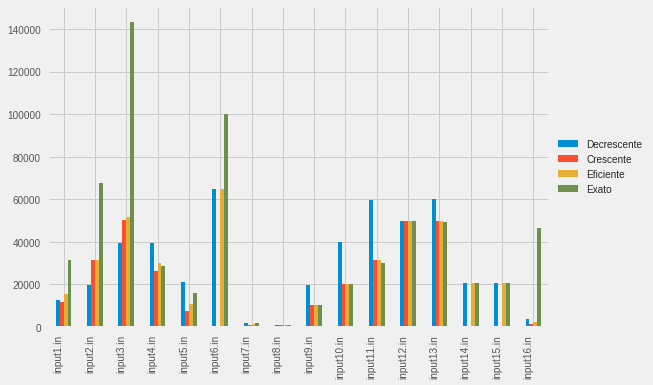

In [16]:
plt.figure(figsize=(10,7))
df.plot(kind='bar',lw=2.5,sort_columns=False)
plt.xticks(rotation=90, ha='right')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

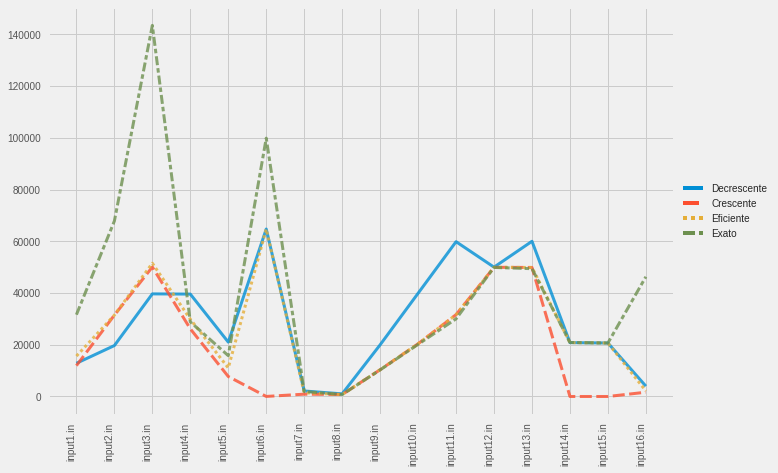

In [17]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, lw=3,sort=False, alpha=0.8)
plt.xticks(rotation=90, ha='right')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

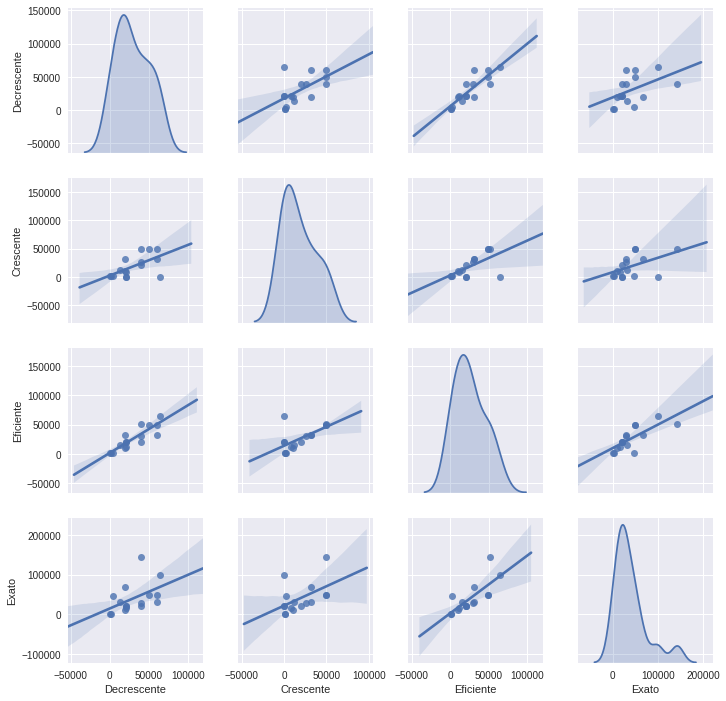

In [18]:
plt.style.use('seaborn')
# plt.style.use('bmh')
# plt.style.use('ggplot')
# plt.style.use('fivethirtyeight')
sns.pairplot(df,diag_kind="kde", kind="reg")

In [19]:
df.corr()

,Decrescente,Crescente,Eficiente,Exato
Decrescente,1.000000,0.599965,0.874581,0.479336
Crescente,0.599965,1.000000,0.631355,0.498988
Eficiente,0.874581,0.631355,1.000000,0.761955
Exato,0.479336,0.498988,0.761955,1.000000


In [20]:
df.corr()['Exato']

Decrescente    0.479336
Crescente      0.498988
Eficiente      0.761955
Exato          1.000000
Name: Exato, dtype: float64

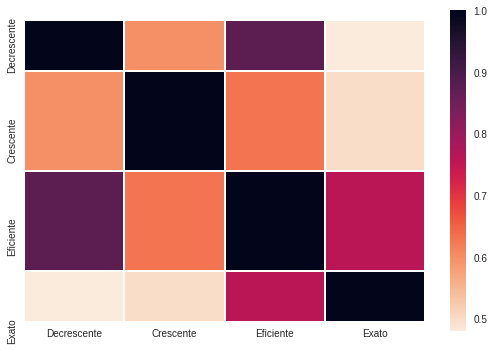

In [29]:
sns.heatmap(df.corr(), cmap = sns.cm.rocket_r ,square=True, lw=1, robust=True)

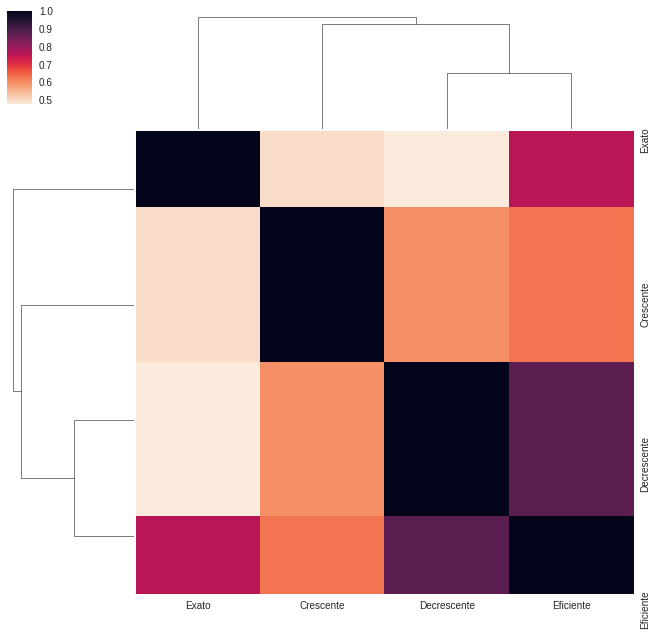

In [111]:
sns.clustermap(df.corr(), cmap = sns.cm.rocket_r)